# Analyse and run the model

In this notebook we are going to build, test, analyze and compare the model with the previous versions. This is followed by improvements to the model and the data. We run this cycle a few times until we achieve realistic and nice results.

But first, let's start by importing the necessary libraries and files, as follows:

In [1]:
# To read the data 
import pickle
import os
import _pickle as cPickle
import bz2

# Import the file with the model functions
import sys
sys.path.append('/Users/marya/PycharmProjects/EmpathicRobot')
from conv_model import *
from models.functions import *

The structure of the models can still be found [here](https://github.com/BB8-2020/EmpathicRobot/blob/classification-model/models/classification-model/conv/conv_model.py).

## Read data

As we have done before, our data is ready to use. In this section we will use **ferPlus** to train the model. This data has already been read, prepared and stored in **hier linkje zetten** this file. 
For now, our data is in a pickel file that we will read as follows:

For simplicity, we set up the path to the data as follows, you can also set it to your own path.

In [2]:
os.chdir(os.getcwd() + '/data/')

We immediately split the data into train, test and validation set.

In [3]:
x_train, y_train, x_val, y_val, x_test, y_test = cPickle.load(bz2.BZ2File('ferPlus_processed', 'rb'))

As we see, the data consists of train set that contains 80% of the data. The validation and the test set are equal in size 20% and are used to subsequently test the model.

This data has already been cleaned and normalized so we don't have to do anything with the data anymore.



In [4]:
print(f"Train set:\nX_train shape:{x_train.shape}\nY_train shape:{y_train.shape}\n")

print(f"Test set:\nX_test shape:{x_test.shape}\nY_test shape:{y_test.shape}\n")

print(f"Validation set:\nX_val shape:{x_val.shape}\nY_val shape:{y_val.shape}")

Train set:
X_train shape:(28390, 48, 48, 1)
Y_train shape:(28390, 7)

Test set:
X_test shape:(3549, 48, 48, 1)
Y_test shape:(3549, 7)

Validation set:
X_val shape:(3549, 48, 48, 1)
Y_val shape:(3549, 7)


## Model version 1

### Build model

Now it is finally time to start working on the model.
We are going to start with the following model:

### Creat model

__1. Conv Layer__

The first layer consists of 64 3x3 filters with ReLU. We set the input of this layer equal to the shape of the train data, which is (48, 48, 1).
We leave the stride and padding at the default value. We do add a Batch normalization. The output of this layer (the activation 
map) is (46, 46, 64).
As laste we add a dropout of 0.5. That brings us to a result of (46, 46, 64)

__2. Conv Layer__


The second layer consists of 64 filters of 3x3 and here we apply relu as well. The output of this layer woudld be (44, 44, 64). we also apply a max pooling of (2,2) and strides od (2,2) that produces an output shape of (44, 44, 64).

__3. Conv Layer__


This layer consists of 128 filter of 3x3 we also apply relu here. The output of this layer would be (20, 20, 128). We do add  Batch normalization. The output of this layer is (20, 20, 128).

__4. Conv Layer__


This layer consists of 128 filter of 3x3 we also apply relu here. The output of this layer would be (18, 18, 128). We also apply a max pooling of (2,2) and strides od (2,2) that produces an output shape of (9, 9, 128).

__5. Conv Layer__ 


The last layer consists of 256 fliter of 3x3 and we apply reule. The output would be (7, 7, 256). We apply here also a max pooling of (2,2) and strides od (2,2) that produces an output shape of (7, 7, 256).
To this layer we add a flatten option, that means the output shape of this layer would be (12544)

__3. Fully connected layer__


This layer takes (12544) as input. We apply a droupout of 0.2. The next dense layer teaks (1024) as input. After applying the drouput for the last time the output shape of this layer is the probability of 7 classes.

In [5]:
# We create all the models that we got 
models = build_models(input_shape=(48, 48, 1), num_classes=7)

In [6]:
# Build the sequential model version 1
model1 = Sequential(models[0]['layers'], name = models[0]['name'])

Let's check the summary out:

In [7]:
model1.summary()

Model: "Version_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 128)       51

Looks good, time to compile!


### Model compile and train


To compile the model we use Adam optimaizer and binary crossentropy as los function. Let us now train the model.

In [8]:
# compile the model
model1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

We set the epochs to 100 and the batch size tot 64.

In [9]:
# TODO: train het model voor 100 epoches 
epochs = 1
batch_size = 64

Let's train the model! 

In [10]:
history1 = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                        steps_per_epoch=len(x_train) // batch_size,
                        validation_data=(x_val, y_val), verbose=2)

443/443 - 501s - loss: 0.3198 - accuracy: 0.5211 - val_loss: 0.3783 - val_accuracy: 0.4046


Now we're going to test our model using the test set for the model.



In [11]:
test_loss, test_acc = model1.evaluate(x_test, y_test, batch_size=batch_size)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

56/56 [==============================] - 14s 258ms/step - loss: 0.3738 - accuracy: 0.4046
Test loss: 0.3738
Test accuracy: 0.4046


## Results 

Let's discuss the results of the model.

In [12]:
# TODO: BESPREKK DE RESULTATEN!!!! MAAR EERST MOET HET MODEL GETRAIEND WORDEN

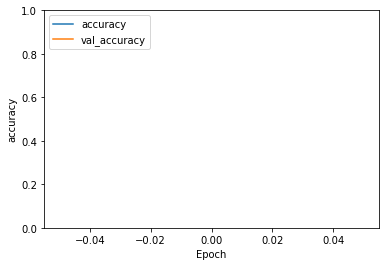

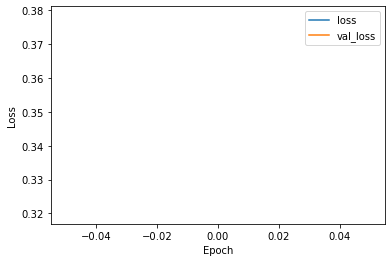

In [13]:
plot_acc_loss(history1)

In [14]:
save_all_model(model1, test_acc)

INFO:tensorflow:Assets written to: saved_all_model4046\assets
Model is saved in a file.


As we saw above, the results are not too great. Therefore we will now try to adjust the settings of the model .

## Model version 2

In [ ]:
# TODO, fix wat hieronder staat!!!

### Build model

#### Create model

__1. Conv Layer__

The first layer consists of 64 3x3 filters with ReLU. We set the input of this layer equal to the shape of the train data, which is (48, 48, 1).
We leave the stride and padding at the default value. We do add a Batch normalization. The output of this layer (the activation 
map) is (46, 46, 64).
As laste we add a dropout of 0.5. That brings us to a result of (46, 46, 64)

__2. Conv Layer__


The second layer consists of 64 filters of 3x3 and here we apply relu as well. The output of this layer woudld be (44, 44, 64). we also apply a max pooling of (2,2) and strides od (2,2) that produces an output shape of (44, 44, 64).

__3. Conv Layer__


This layer consists of 128 filter of 3x3 we also apply relu here. The output of this layer would be (20, 20, 128). We do add  Batch normalization. The output of this layer is (20, 20, 128).

__4. Conv Layer__


This layer consists of 128 filter of 3x3 we also apply relu here. The output of this layer would be (18, 18, 128). We also apply a max pooling of (2,2) and strides od (2,2) that produces an output shape of (9, 9, 128).

__5. Conv Layer__ 


The last layer consists of 256 fliter of 3x3 and we apply reule. The output would be (7, 7, 256). We apply here also a max pooling of (2,2) and strides od (2,2) that produces an output shape of (7, 7, 256).
To this layer we add a flatten option, that means the output shape of this layer would be (12544)

__3. Fully connected layer__


This layer takes (12544) as input. We apply a droupout of 0.2. The next dense layer teaks (1024) as input. After applying the drouput for the last time the output shape of this layer is the probability of 7 classes.

In [15]:
model2 = Sequential(models[1]['layers'], name = models[1]['name'])

In [16]:
model2.summary()

Model: "Version_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization_3 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 42, 42, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 40, 40, 64)        36

In [17]:
model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                        steps_per_epoch=len(x_train) // batch_size,
                        validation_data=(x_val, y_val), verbose=2)

In [ ]:
test_loss, test_acc = model1.evaluate(x_test, y_test, batch_size=batch_size)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

In [ ]:
## Results 

In [ ]:
plot_acc_loss(history2)

In [ ]:
save_all_model(model2, test_acc)